# Lung Abnormality Multi-Class Segmentation: Introduction to Project & Initial Model Details
This notebook documents the initial setup, training, and analysis of a deep learning model for multi-class segmentation of lung abnormalities from chest X-ray images. Our goal is to iteratively improve the model's ability to distinguish between healthy lung tissue and various types of infections.

## Table of Contents

<a name='1'></a>
## 1. Introduction to the Problem
Lung segmentation in chest X-rays is a critical task in medical imaging. It involves identifying and delineating specific regions of interest, such as healthy lung tissue and various types of abnormalities. This project focuses on multi-class semantic segmentation, aiming to classify each pixel into one of four categories:

- Class 0: Background (pixels outside the lung or image boundary)

- Class 1: Healthy Lung Tissue (pixels inside the lung boundary that are not identified as an infection)

- Class 2: COVID-19 Infection (pixel regions specifically identified as COVID-19 related opacities)

- Class 3: Non-COVID Infection (pixel regions within the lung boundary representing other infections like bacterial or viral pneumonia)

Accurate segmentation can significantly aid clinicians in faster diagnosis, monitoring disease progression, and treatment planning, especially for respiratory illnesses like pneumonia and COVID-19.

This project was undertaken with the primary motivation of practically implementing a 2D Convolutional Neural Network (CNN) for a real-world problem, following completion of Andrew Ng's DeepLearning.Ai course. It serves as a hands-on application of learned theoretical concepts in a challenging and impactful domain.

<a name='1.1'></a>
### 1.1 The Chosen Dataset: COVID-QU-Ex
For this project, we are using the COVID-QU-Ex Dataset.

Why we chose it: This dataset is highly suitable for our multi-class segmentation goal because it provides a diverse collection of chest X-ray images categorized into COVID-19, Non-COVID (other pneumonias), and Normal cases. Crucially, it includes pixel-level annotations (masks) for both general lung boundaries and specific COVID-19 infection regions. The inclusion of Non-COVID cases is vital as it allows us to build a more robust, multi-class model that distinguishes between different pathologies, moving beyond simple binary "abnormal vs. normal" classification. This directly supports our objective of developing a more clinically useful and nuanced diagnostic tool.

The decision to use this dataset was also heavily influenced by its ease of access and availability. Initial research into suitable medical imaging datasets quickly revealed that Kaggle datasets were the most accessible options for practical implementation. Other, more clinically recent and specialized datasets often understandably required extensive certifications or had paid access models, which we aimed to minimize for this project. Choosing an readily available dataset allowed us to focus our resources on the deep learning implementation and iterative model improvement rather than on complex data acquisition procedures.

<a name='2'></a>
## 2. Brief Explanation of Convolutional Neural Networks (CNNs)
Convolutional Neural Networks (CNNs) are a specialized class of deep learning models explicitly designed to process data with a known grid-like topology, such as images. They are the driving force behind most advancements in computer vision.

At their core, CNNs use convolutional layers to automatically learn spatial hierarchies of features directly from raw image data. Instead of us having to manually design features (like edge detectors or corner detectors), a CNN learns these filters (small matrices) that detect relevant patterns at various levels of abstraction.

> Convolutional Layer: This is the primary building block. It applies a set of learnable filters (also called kernels) to the input image. Each filter slides (convolves) across the image, performing element-wise multiplication and summing the results, producing a feature map that highlights specific patterns (e.g., edges, textures).

> Pooling Layer (e.g., Max Pooling): These layers reduce the spatial dimensions (width and height) of the feature maps. This serves two main purposes: it reduces the computational cost of the network, and it makes the detected features more robust to slight variations in the position of the patterns in the input image.

> Activation Functions (e.g., ReLU - Rectified Linear Unit): Applied after convolutional layers, these introduce non-linearity into the network. This allows the CNN to learn more complex and non-linear relationships within the data, which is essential for understanding intricate image patterns.

For tasks like semantic segmentation, where we need a pixel-level output (i.e., classifying every pixel in the image), CNNs are typically structured in an "encoder-decoder" fashion.

<a name='3'></a>
## 3. Our Chosen Model: U-Net with ResNet50 Backbone
Our model is a powerful combination: a U-Net architecture that leverages a ResNet50 pre-trained backbone. This blend is highly effective for medical image segmentation tasks.

### 3.1 U-Net Architecture
The U-Net architecture is famously named for its distinctive U-shape, comprising two main symmetrical parts:

> Encoder (Contracting Path): This side functions like a traditional CNN. It progressively applies convolutional and pooling layers, gradually reducing the spatial dimensions of the input image while increasing the number of feature channels. Its role is to capture contextual information and learn robust features from the image (i.e., understanding what is in the image).

> Decoder (Expansive Path): This side is responsible for precisely localizing the segmentation. It uses upsampling layers (like transposed convolutions or simple upsampling followed by convolutions) to gradually increase the spatial resolution of the feature maps. Crucially, it combines these upsampled features with high-resolution features directly from the encoder via skip connections.

> Why U-Net for Segmentation: The U-Net's primary strength is its skip connections. These connections directly transfer fine-grained spatial information (details about edges, textures, and locations) from earlier layers of the encoder to the corresponding layers in the decoder. This prevents the loss of crucial boundary information that would otherwise occur during the encoder's downsampling process, enabling the decoder to produce highly accurate and localized segmentation masks.

### 3.2 ResNet50 Backbone
Instead of building a simple convolutional encoder from scratch, we enhance the encoder part of our U-Net by incorporating ResNet50 as its backbone.

> ResNet50: A very deep Convolutional Neural Network, part of the Residual Network family. Its key innovation lies in its "residual connections" (also known as skip connections within the encoder blocks). These connections allow the gradients to flow more easily through many layers, mitigating the "vanishing gradient" problem and enabling the effective training of very deep networks.

> Pre-trained on ImageNet: Our ResNet50 backbone is initialized with weights learned from the vast ImageNet dataset, a collection of millions of images across 1000 object categories. This technique is known as transfer learning.

#### Why ResNet50 Backbone:

> Feature Richness (Transfer Learning): By using a pre-trained ResNet50, our model starts with a strong foundation of learned visual features (edges, textures, shapes) that are generally applicable to many image tasks. This significantly reduces the amount of data and time needed to train the model, especially on smaller, specialized datasets like medical images.

> Robust Feature Extraction: ResNet50 is known for its ability to extract powerful and hierarchical features, which serves as an excellent starting point for the U-Net's segmentation task.

> Deep Network Capabilities: Its residual connections allow for deeper feature extraction, which can be beneficial for complex tasks like distinguishing subtle lung pathologies.

By combining the U-Net's precise localization with ResNet50's powerful pre-trained feature extraction, we aim to build a robust and accurate multi-class lung segmentation model.

<a name='4'></a>
## 4. Explanation of Scripts in src/

Our project is organized into several Python scripts within the src/ directory, each with a specific responsibility:

### src/main.py:

Purpose: This is the main entry point for our entire project. It acts as a command-line interface.

Functionality: It uses the argparse module to accept command-line arguments (e.g., --train, --evaluate, --predict). Based on the argument provided, it imports and calls the main function from the corresponding script (train.py, evaluate.py, or predict_and_visualize.py).

Why: Provides a clean, unified way to run different tasks of the project without directly executing individual scripts.

### src/data_loader.py:

Purpose: Handles all aspects of loading, preprocessing, and augmenting our image and mask data.

Functionality:

get_covid_qu_ex_paths(base_data_dir): Scans the dataset directory, collects paths for images (Normal, COVID, Non-COVID), specific COVID-19 infection masks, and general lung masks. It intelligently constructs multi-class masks (0: Background, 1: Healthy, 2: COVID, 3: Non-COVID) based on the image type and mask availability. It also performs an 80/10/10 train/val/test split, stratified by image type.

load_image_and_multi_class_mask(...): Reads individual image and mask files, resizes them to a consistent IMG_HEIGHT x IMG_WIDTH, normalizes pixel values, and converts the integer-encoded masks into one-hot encoded multi-class masks (e.g., a pixel with COVID-19 infection might become [0,0,1,0]).

augment_data(image, mask): Applies basic data augmentation (e.g., horizontal flipping) consistently to both images and their corresponding masks.

get_dataset(...): Creates optimized tf.data.Dataset objects, which are highly efficient for feeding data to TensorFlow models. It incorporates shuffling, mapping of loading/augmentation functions (num_parallel_calls=tf.data.AUTOTUNE), batching, and prefetching (buffer_size=tf.data.AUTOTUNE) for performance.

Why: Centralizes data handling, ensures consistency in preprocessing, and creates an efficient data pipeline to prevent bottlenecks during GPU training.

### src/model.py:

Purpose: Defines the U-Net model architecture with a ResNet50 backbone.

Functionality:

build_unet_resnet50(input_shape, num_classes): Initializes the ResNet50 model (pre-trained on ImageNet) as the encoder. Crucially, it sets base_model.trainable = False to freeze the ResNet50 layers, allowing us to leverage transfer learning without training the entire massive network from scratch. It then constructs the decoder path, using skip connections from various ResNet50 encoder layers, and ends with a final convolutional layer that has NUM_CLASSES (4) output filters and a softmax activation function for multi-class pixel classification.

Why: Separates the model definition from the training logic, making the code modular, reusable, and easier to modify. Freezing the backbone drastically reduces trainable parameters and training time.

### src/train.py:

Purpose: Manages the training process of the model.

Functionality:

Sets hyperparameters (BATCH_SIZE, EPOCHS, LEARNING_RATE).

Enables Mixed Precision Training (tf.keras.mixed_precision.set_global_policy('mixed_float16')) and XLA JIT Compiler (tf.config.optimizer.set_jit(True)) for significant GPU acceleration.

Defines custom multi-class loss (combined_loss_multi_class) and metric (dice_coeff_multi_class) functions using a combination of Categorical Cross-Entropy and Dice Loss.

Compiles the build_unet_resnet50 model with the Adam optimizer and the custom loss/metrics.

Sets up callbacks for training: ModelCheckpoint (to save the best model based on validation loss), EarlyStopping (to stop training if validation loss doesn't improve for several epochs), ReduceLROnPlateau (to reduce learning rate if validation loss plateaus), and TensorBoard (for logging training progress).

Executes model.fit() to start the training loop.

Why: Encapsulates the entire training procedure, including optimizations and monitoring tools, ensuring consistency and reproducibility of experiments.

### src/evaluate.py:

**Purpose**: Evaluates the performance of the trained model on the unseen test set.

**Functionality**: Loads the trained model (best_unet_resnet50_multi_class.h5) from saved_models/, loads the test dataset via data_loader.py, and then calls model.evaluate() to compute the final loss and metrics (Categorical Accuracy, Dice Coefficient) on the test data.

**Why**: Provides an unbiased assessment of the model's generalization capabilities on data it has never seen before.

### src/predict_and_visualize.py:

**Purpose**: Loads the trained model, makes predictions on test images, and visualizes the results.

**Functionality**: Loads the best model, selects a few random images from the test set, performs inference (prediction) to generate multi-class segmentation masks, and then uses Matplotlib to display the original image, the true ground-truth mask, and the model's predicted mask side-by-side. It uses a custom COLORMAP and legend to clearly differentiate between the four output classes.

**Why**: Provides crucial qualitative feedback on the model's performance. Visual inspection helps understand the types of errors the model makes and guides further improvements.

## 5. Training Process on Google Colab: Optimizations and Setup
Our initial training run was executed on Google Colab, leveraging its GPU resources for acceleration. The setup involved a series of steps to ensure optimal performance.
#### 5.1 GPU Optimizations Applied
Before starting training, we implemented several key optimizations in src/train.py to maximize GPU utilization and reduce training time:

Freezing ResNet50 Backbone: In src/model.py, we set base_model.trainable = False immediately after loading the pre-trained ResNet50.

Why: This prevents the vast majority of the ResNet50's parameters (over 23 million) from being updated during training. Instead of learning general features from ImageNet again, the model focuses its learning on the relatively smaller U-Net decoder, which is responsible for task-specific segmentation. This drastically reduces the computational load per step.

Mixed Precision Training: Enabled using tf.keras.mixed_precision.set_global_policy('mixed_float16') at the start of train.py's main function.

Why: Modern GPUs (like the A100) are highly efficient at performing calculations using float16 (half-precision) data types, especially via their Tensor Cores. Mixed precision performs most operations in float16 while strategically keeping critical parts (like loss calculations) in float32 for numerical stability. This typically doubles training speed and reduces GPU memory usage.

XLA (Accelerated Linear Algebra): Enabled using tf.config.optimizer.set_jit(True) before model compilation in train.py.

Why: XLA is a compiler that optimizes TensorFlow graphs by fusing operations and generating highly efficient machine code tailored to the specific hardware (the A100 GPU). This can provide an additional boost in training speed.

Optimized tf.data Pipeline: Our data_loader.py uses tf.data.AUTOTUNE for parallel mapping and prefetching (buffer_size=tf.data.AUTOTUNE).

Why: This ensures that the CPU (or other processing units) prepares and loads the next batch of data in parallel while the GPU is busy training on the current batch. This prevents the GPU from sitting idle, waiting for data, which is a common bottleneck.

Increased Batch Size to 128: Leveraging the A100 GPU's ample VRAM (40GB/80GB), we were able to significantly increase the BATCH_SIZE to 128.

Why: Processing more samples in a single step allows for greater parallelization on the GPU. This means the GPU's many processing units can be kept busy simultaneously, leading to much faster training throughput per step. This high degree of parallelization through larger batch sizes was a key factor in achieving significantly faster training through the epochs, drastically reducing the total time required for the entire training run compared to smaller batch sizes on less powerful GPUs.

### 6. Analyzing the Training Process
After the training run completed on Google Colab, the generated TensorBoard logs were downloaded locally. In this section, we'll analyze the training process directly within this Jupyter notebook by loading these logs and visualizing the key metrics.

#### 6.1 Loading Training History from TensorBoard Logs
TensorBoard saves training metrics (loss, accuracy, custom metrics) as event files. We can use tensorboard.backend.event_processing.event_accumulator to read these files and extract the scalar data, which can then be converted into a Pandas DataFrame for easier manipulation and plotting.


c:\Users\leese\Documents\Projects\lung_abnormality_segmentation\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\leese\Documents\Projects\lung_abnormality_segmentation\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\leese\Documents\Projects\lung_abnormality_segmentation\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime

True
Starting prediction and visualization script...
Loading COVID-QU-Ex dataset paths from: ../data/raw/COVID-QU-Ex_Dataset

  Found 7658 images in ../data/raw/COVID-QU-Ex_Dataset\Train\COVID-19\images
  Found 7208 images in ../data/raw/COVID-QU-Ex_Dataset\Train\Non-COVID\images
  Found 6849 images in ../data/raw/COVID-QU-Ex_Dataset\Train\Normal\images

  Found 1903 images in ../data/raw/COVID-QU-Ex_Dataset\Val\COVID-19\images
  Found 1802 images in ../data/raw/COVID-QU-Ex_Dataset\Val\Non-COVID\images
  Found 1712 images in ../data/raw/COVID-QU-Ex_Dataset\Val\Normal\images

  Found 2395 images in ../data/raw/COVID-QU-Ex_Dataset\Test\COVID-19\images
  Found 2253 images in ../data/raw/COVID-QU-Ex_Dataset\Test\Non-COVID\images
  Found 2140 images in ../data/raw/COVID-QU-Ex_Dataset\Test\Normal\images

Total images found for processing: 21964
Training samples after custom split: 17570
Validation samples after custom split: 2197
Test samples after custom split: 2197
Loading model from ../sa

Model loaded successfully.

Predicting and visualizing 5 random samples from the test set...


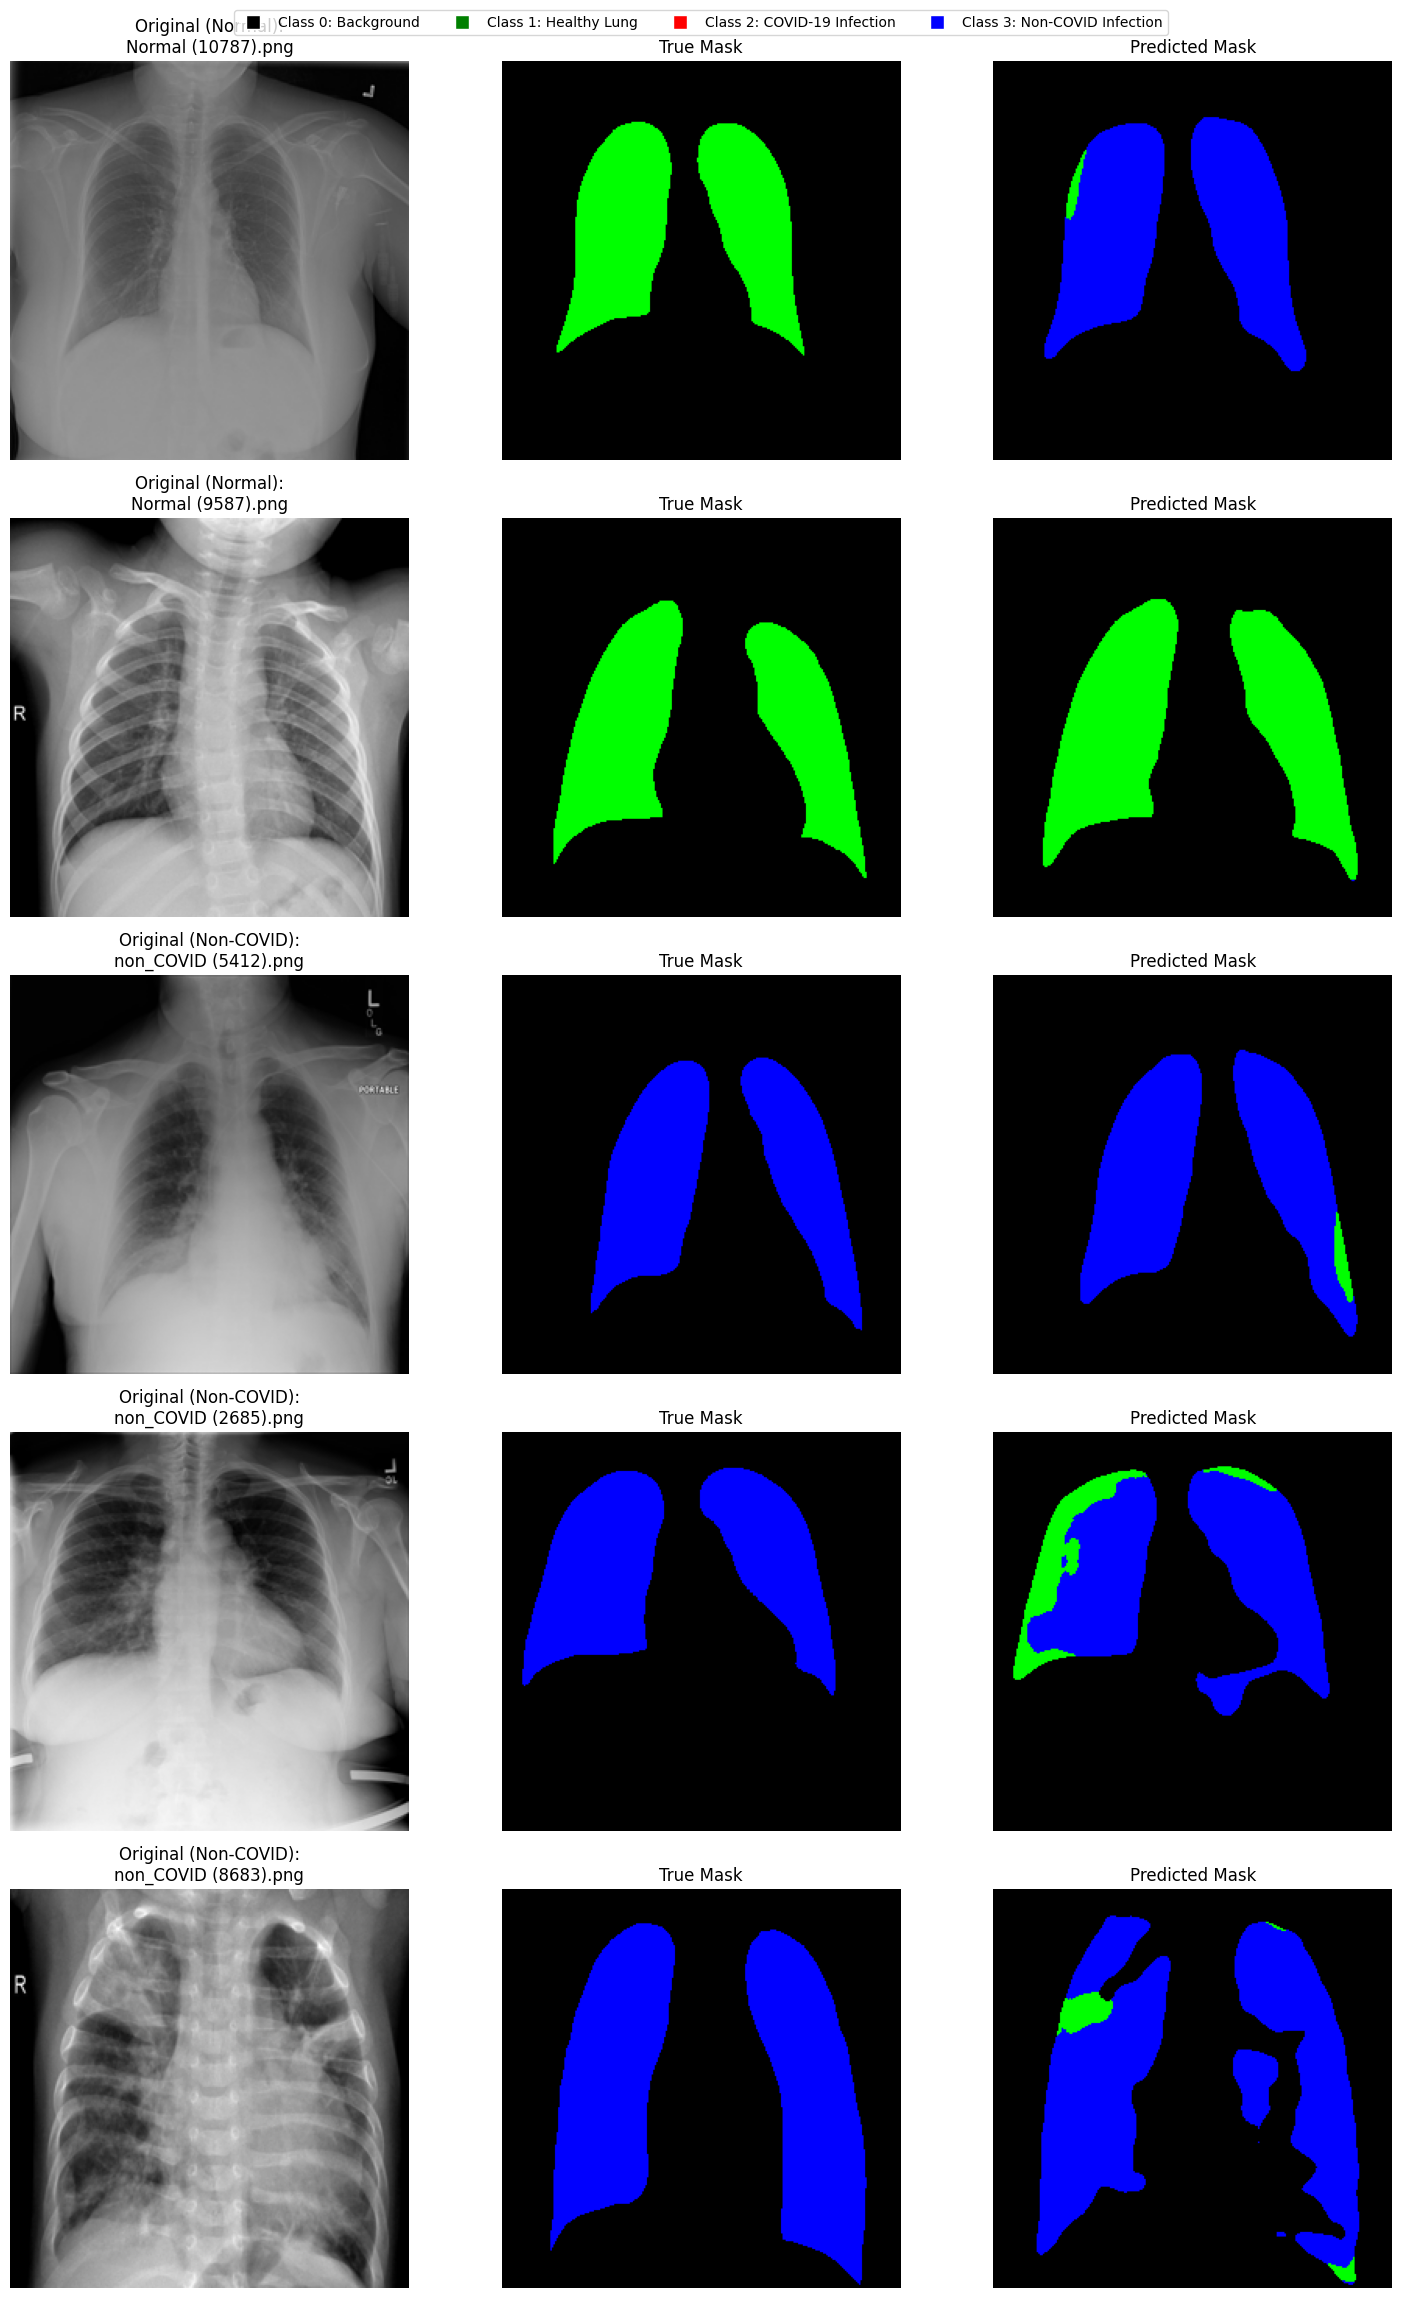

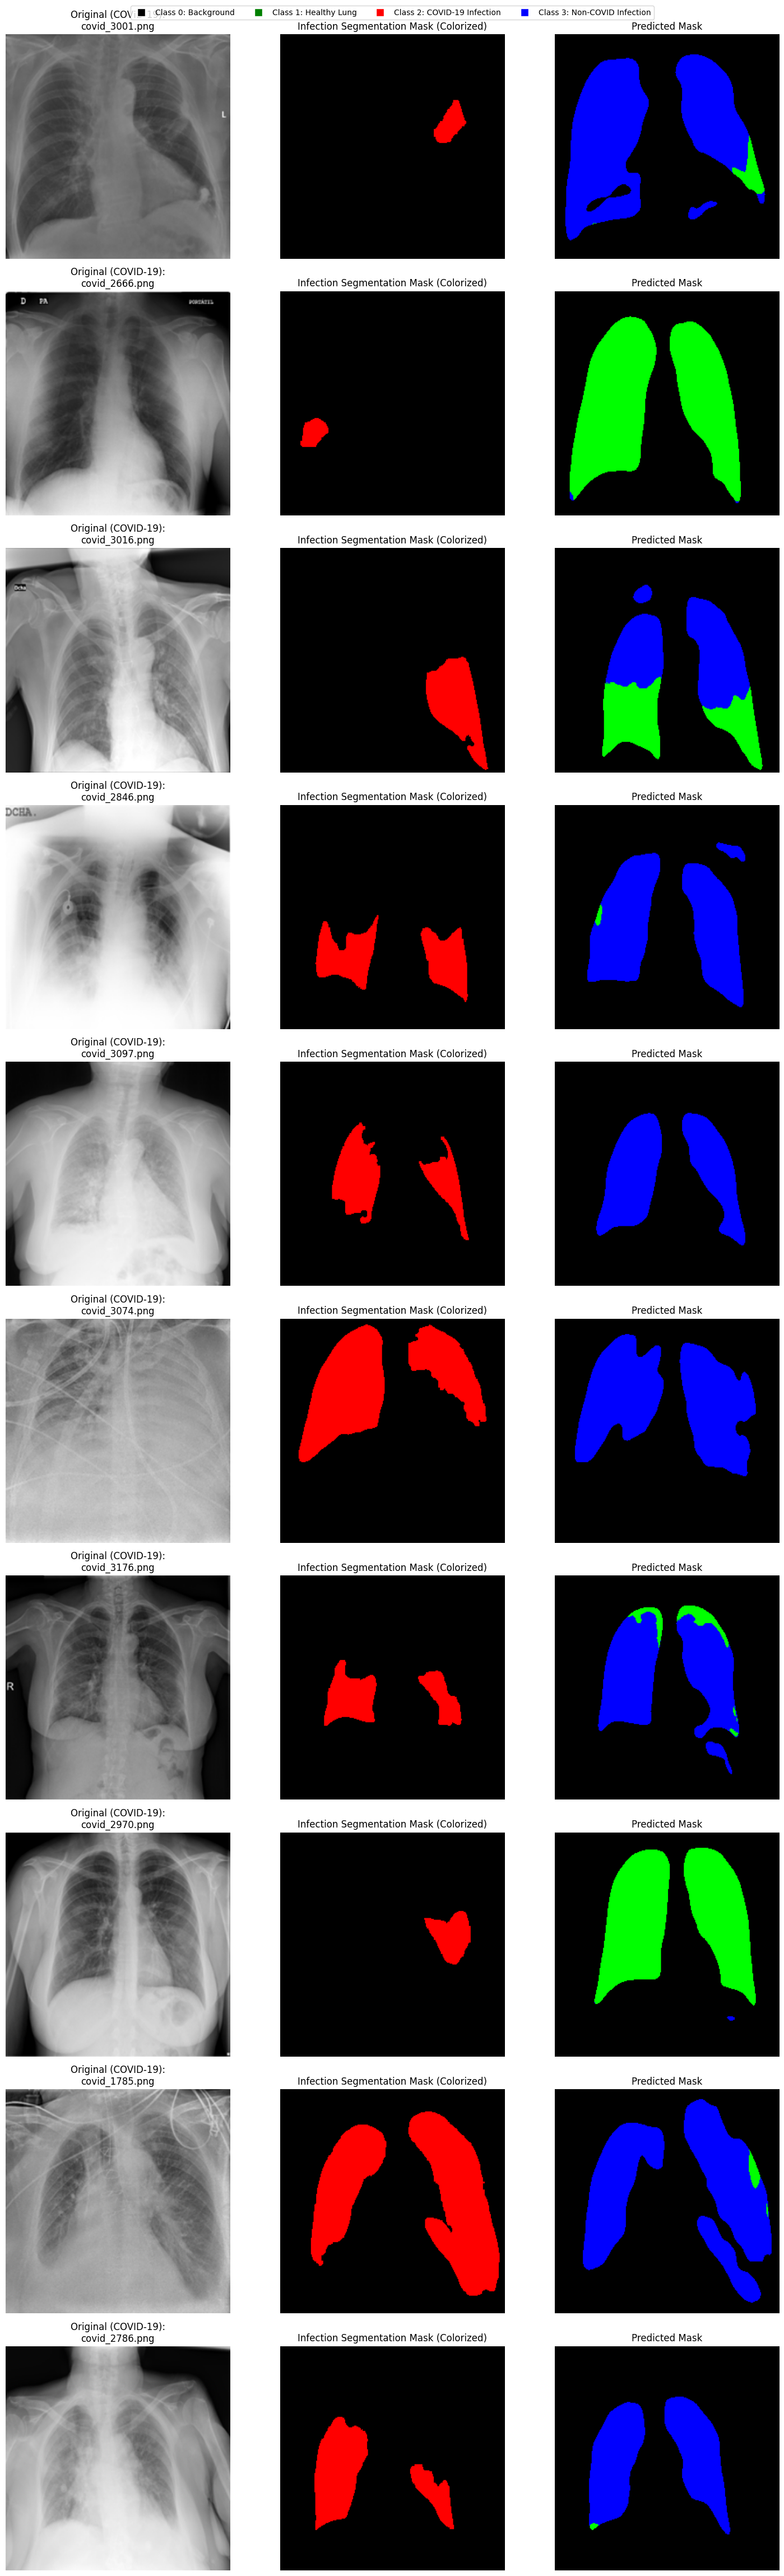

In [5]:
%run ../src/predict_and_visualize.py

In [9]:
%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir logs/fit_classification/20250902-203202
#%tensorboard --logdir "c:/Users/leese/Documents/Projects/lung_abnormality_segmentation/logs/fit_classification/20250902-194547"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 16796), started 5:06:40 ago. (Use '!kill 16796' to kill it.)

c:\Users\leese\Documents\Projects\lung_abnormality_segmentation\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\leese\Documents\Projects\lung_abnormality_segmentation\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\leese\Documents\Projects\lung_abnormality_segmentation\venv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime

Starting prediction and visualization script...

Total images found for processing: 21715
Training samples after custom split: 17372
Validation samples after custom split: 2171
Test samples after custom split: 2172


Model loaded successfully.


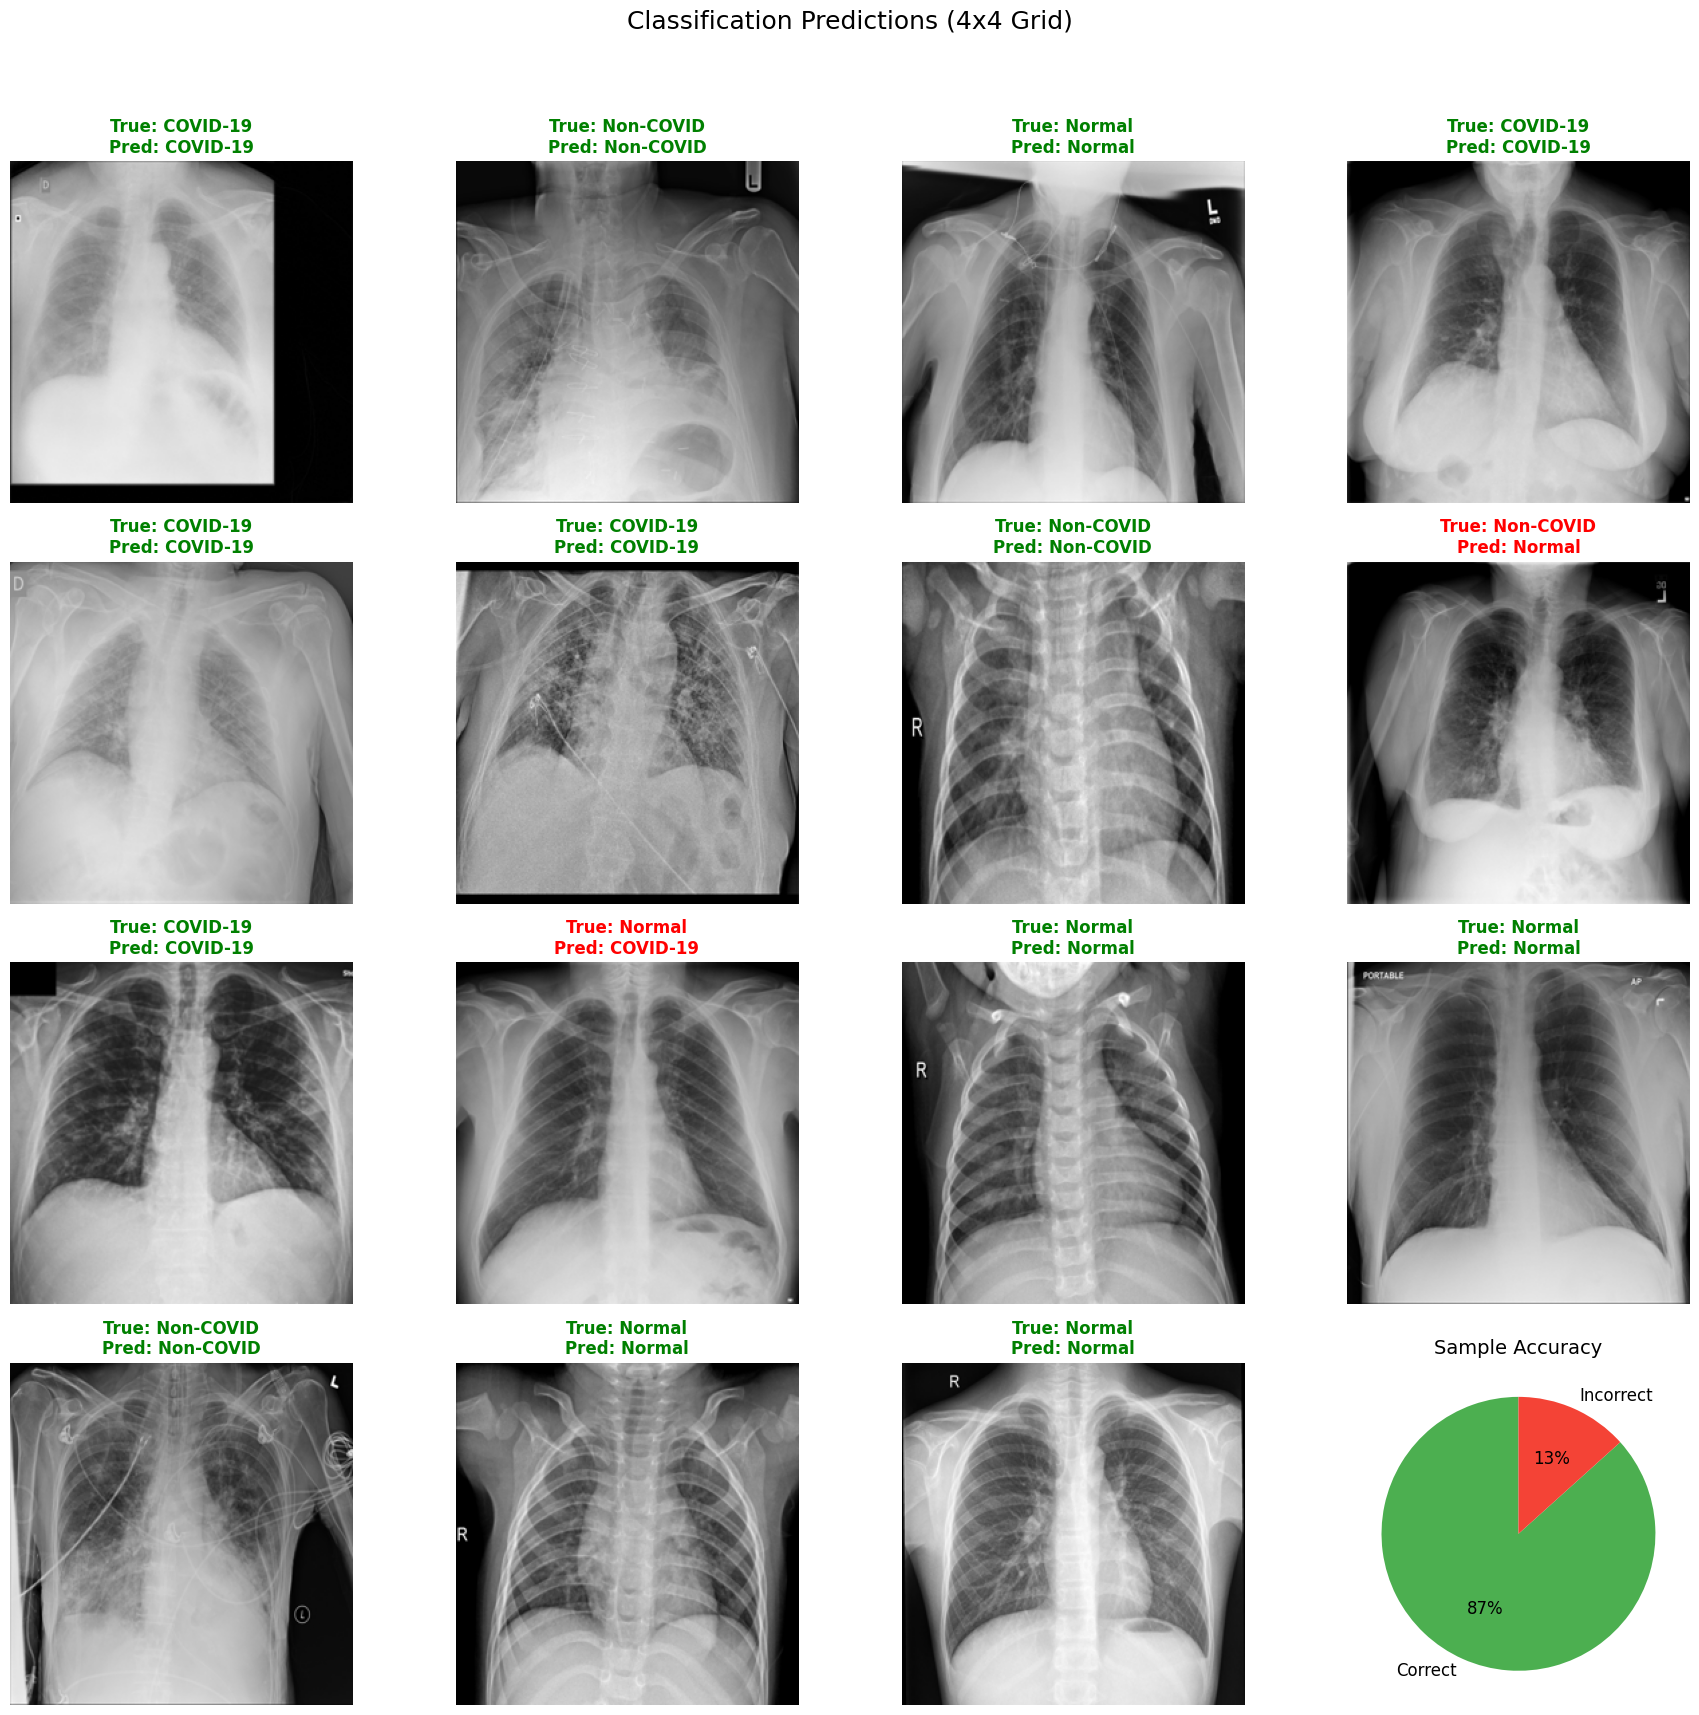

In [ ]:
# Showing the initial cat model is not very accurate
%run ../src_classification/predict.py